### Problem 2: $e^{x^{2}}$ ###

Using the Monte Carlo's method, we will evaluate the following integral:

$$\int_{0}^{x_{0}}e^{x^{2}}dx$$

Max value of the curve: 4.220695816996552.
Min value of the curve: 1.0.


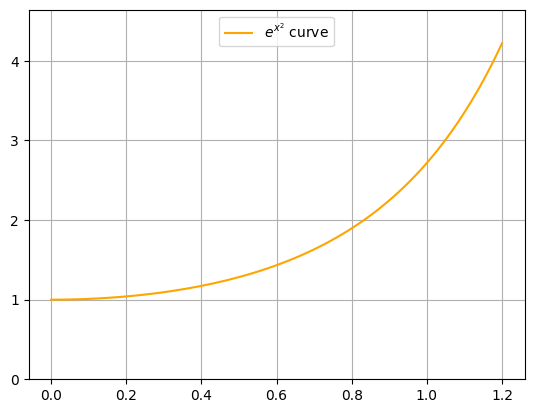

In [88]:
# First: Defining the parameters and visualizating the curve

import numpy as np
import matplotlib.pyplot as plt

d = 101 # Number os points of points in the x-axis discretization
n = 3000 # Number of random points in the Monte Carlo's method
x0 = 1.2

def random_points(x_min,x_max,y_min,y_max, numer_of_points, n_discretization = 101): # Function to generate random points
    x_coordenates = []
    y_coordenates = []
    x_function_interval = np.linspace(x_min, x_max, n_discretization)
    for i in range(0,numer_of_points,1):
        x = np.random.choice(x_function_interval)
        y = np.random.uniform(y_min,y_max)
        x_coordenates.append(x)
        y_coordenates.append(y)
    return (np.array(x_coordenates), np.array(y_coordenates))

def f(x): # Integrated function
    x2 = np.power(x,2)
    return np.exp(x2)

x_interval = np.linspace(0,x0,d)
function_curve = f(x_interval)

max_curve_value = np.max(function_curve)
min_curve_value = np.min(function_curve)

plt.plot(x_interval, function_curve, color = 'orange', label = r'$e^{x^{2}}$ curve')
plt.grid(True)
plt.legend(loc = 'upper center')
plt.ylim(0,1.1*max_curve_value)
print(f'Max value of the curve: {max_curve_value}.')
print(f'Min value of the curve: {min_curve_value}.')
plt.show()

Red - Points inside the area (number: 1270).
Blue - Points outside the area (number: 1730).

Approximate area by Monte Carlo's method: 2.1441134750342483 a.u. (number of points: 3000).


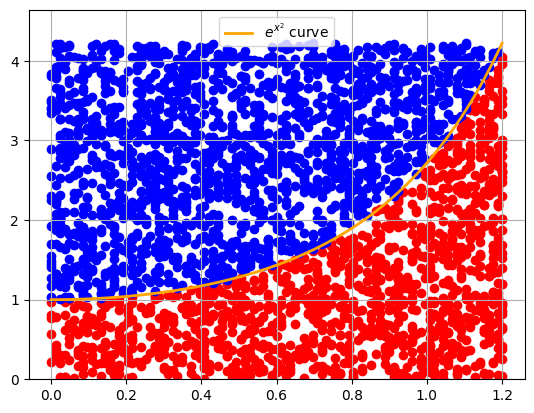

In [86]:
# Applying Monte Carlo's method

x_coordenates, y_coordenates = random_points(x_interval[0],x_interval[-1],0,max_curve_value,n, d)

n_inside = 0
n_outside = 0

x_inside = []
y_inside = []
x_outside = []
y_outside = []

for i in range(0,n, 1):
    x_i = np.where(x_interval == x_coordenates[i])[0][0]
    if y_coordenates[i] < function_curve[x_i]:
        x_inside.append(x_coordenates[i])
        y_inside.append(y_coordenates[i])
        n_inside += 1
    else:
        x_outside.append(x_coordenates[i])
        y_outside.append(y_coordenates[i])
        n_outside += 1

# Calculating the approximate area and ploting the graph:

A_know = (x_interval[-1]-x_interval[0]) * max_curve_value
A = A_know * n_inside/n # n = n_inside + n_outside

x_inside = np.array(x_inside)
x_outside = np.array(x_outside)
y_inside = np.array(y_inside)
y_outside = np.array(y_outside)

plt.plot(x_interval, function_curve, label = r'$e^{x^{2}}$ curve', color = 'orange', linewidth = 2)
plt.scatter(x_inside, y_inside, color = 'red')
plt.scatter(x_outside, y_outside, color = 'blue')
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,1.1*max_curve_value)
print(f'\033[31mRed - Points inside the area (number: {n_inside}).')
print(f'\033[34mBlue - Points outside the area (number: {n_outside}).\033[0m')
print(f"\n\033[1mApproximate area by Monte Carlo's method: {A} a.u. (number of points: {n}).\033[0m")
plt.show()